# <center><h1>Taxi Fare Prediction</h1></center>

### Problem Statement
This case study is to predict the taxi fare for a taxi ride in New York City from a given pickup point to the agreed dropoff location. Decision tree and Random Forest regressor is used for the fare prediction.

### Data Definition

unique_id: Unique identifier or key for each record in the dataset - (string)

date_time_of_pickup: time when the ride started - (timestamp)

longitude_of_pickup: Longitude of the taxi ride pickup point - (float) - (Numerical)

latitude_of_pickup: Latitude of the taxi ride pickup point - (float) - (Numerical)

longitude__of_dropoff: Longitude of the taxi ride dropoff point - (float) - (Numerical)

latitude_of_dropoff: Latitude of the taxi ride dropoff point - (float) - (Numerical)

no_of_passenger: count of the passengers during the ride - (integer) - (Numerical)

amount: (target variable)dollar amount of the cost of the taxi ride

### Table Content
Import Libraries

Set Options

Read Data

Prepare and Analyze the Data
4.1 - Understand the Data
4.1.1 - Data Type
4.1.2 - Feature Engineering
4.1.3 - Summary Statistics
4.1.4 - Discover Outliers
4.1.5 - Missing Values
4.1.6 - Correlation
4.2 - Exploratory Data Analysis
4.2.1 - Peak hours
4.2.2 - Mean fare for each hour during weekdays and weekends
4.2.3 - Distribution of key numerical variables

Random Forest
5.1 - Random Forest Model
5.2 - Random Forest with GridSearchCV

Conclusion and Interpretation

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor 
from math import radians, cos, sin, sqrt, asin

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
plt.rcParams["figure.figsize"] = [15,8]

In [4]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
np.set_printoptions(suppress = True)

In [5]:
import os 
os.chdir(r"D:\Imarticus\ML\Supervised learning\5-Random forest")

### Read Data 

In [6]:
df_taxi = pd.read_csv("TaxiFare.csv")
df_taxi.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


**The column unique_id contains the unique identifier for each observation, which is redundant for further analysis. Thus, we drop this column**

In [7]:
df_taxi = df_taxi.drop("unique_id",axis = 1)

### Prepare and Analyze the Data
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. If not as per business context, change the data types
3. Study Summary Statistics
4. Distribution of Variables
5. Analyze relationship between numeric variables
6. Check for missing values
7. Study correlation
8. Analyze relationship between numeric and categoric variables

Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

In [8]:
df_taxi.shape

(50000, 7)

In [9]:
df_taxi.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [10]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


### Chenge the inccorect type of data type to solve problem easily

In [11]:
df_taxi.date_time_of_pickup = pd.to_datetime(df_taxi.date_time_of_pickup,errors = "coerce")

In [12]:
df_taxi.dtypes

amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

### Feature Engineering
We will extract date time features from the variable 'date_time_of_pickup'.

	
For feature engineering, we do the following:

1. Feature addition
2. Drop the redundant variables
1. Add new variables

We will extract new features from variable date_time_of_pickup . We will also add a variable which measures the distance between the pickup and dropoff point.

In [13]:
df_taxi = df_taxi.assign(hour = df_taxi.date_time_of_pickup.dt.hour,
                        day =  df_taxi.date_time_of_pickup.dt.day,
                        month =  df_taxi.date_time_of_pickup.dt.month,
                        year =  df_taxi.date_time_of_pickup.dt.year,
                        dayofweek =  df_taxi.date_time_of_pickup.dt.dayofweek)
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [14]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],
                                               latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [15]:
df_taxi['travel_dist_km'] = distance_transform(df_taxi['longitude_of_pickup'].to_numpy(),
                                                df_taxi['latitude_of_pickup'].to_numpy(),
                                                df_taxi['longitude_of_dropoff'].to_numpy(),
                                                df_taxi['latitude_of_dropoff'].to_numpy()
                                              )

In [16]:
df_taxi.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


###  droping the Redundant

In [17]:
df_taxi = df_taxi.drop("date_time_of_pickup", axis = 1)

In [18]:
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   longitude_of_pickup   50000 non-null  float64
 2   latitude_of_pickup    50000 non-null  float64
 3   longitude_of_dropoff  50000 non-null  float64
 4   latitude_of_dropoff   50000 non-null  float64
 5   no_of_passenger       50000 non-null  int64  
 6   hour                  50000 non-null  int64  
 7   day                   50000 non-null  int64  
 8   month                 50000 non-null  int64  
 9   year                  50000 non-null  int64  
 10  dayofweek             50000 non-null  int64  
 11  travel_dist_km        50000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 4.6 MB


In [19]:
df_taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000
hour,50000.0,13.489080,6.506935,0.000000,9.000000,14.000000,19.000000,23.000000
day,50000.0,15.672040,8.660789,1.000000,8.000000,16.000000,23.000000,31.000000
month,50000.0,6.273300,3.461157,1.000000,3.000000,6.000000,9.000000,12.000000
year,50000.0,2011.739260,1.862639,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


### Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.
Let us detect the extreme values in the data. 


The following can be considered as outliers in this case study:
1. Amount < 2.5
2. Trips with travel distance less than or equal to 0, and more than 130Kms
3. Trips where 90< latitude <-90, 180 < longitude < -180    

**1.We have seen that there are instances of amount less that 0 as well in the data set, where as the minimum fare for any trip in NYC is 2.5 dollars, hence we will remove such observations. We have already seen that the max fare is 200 in the data set.**

In [20]:
df_taxi = df_taxi.loc[df_taxi.amount>=2.5]

In [21]:
df_taxi.shape

(49990, 12)

In [22]:
df_taxi = df_taxi.loc[(df_taxi.travel_dist_km >=1 ) | (df_taxi.travel_dist_km <=130 ) ]

In [23]:
df_taxi.shape

(49990, 12)

In [24]:
incorrect_coordinates = df_taxi.loc[(df_taxi.latitude_of_pickup > 90) |(df_taxi.latitude_of_pickup < -90) |
                                   (df_taxi.latitude_of_dropoff > 90) |(df_taxi.latitude_of_dropoff < -90) |
                                   (df_taxi.longitude_of_pickup > 180) |(df_taxi.longitude_of_pickup < -180) |
                                   (df_taxi.longitude_of_dropoff > 180) |(df_taxi.longitude_of_dropoff < -180)
                                    ].index

In [25]:
df_taxi.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [26]:
print("Remaining observations in the dataset:", df_taxi.shape)

Remaining observations in the dataset: (49989, 12)


In [27]:
Total = df_taxi.isnull().sum().sort_values(ascending = False)          


Percent = (df_taxi.isnull().sum()*100/df_taxi.isnull().count()).sort_values(ascending = False)   


missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    


missing_data['Type'] = df_taxi[missing_data.index].dtypes
missing_data

,Total,Percentage of Missing Values,Type
amount,0,0.0,float64
longitude_of_pickup,0,0.0,float64
latitude_of_pickup,0,0.0,float64
longitude_of_dropoff,0,0.0,float64
latitude_of_dropoff,0,0.0,float64
no_of_passenger,0,0.0,int64
hour,0,0.0,int64
day,0,0.0,int64
month,0,0.0,int64
year,0,0.0,int64


### Study Correlation

In [28]:
corr = df_taxi.corr()

In [29]:
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
amount,1.000000,0.005905,-0.006563,0.004452,-0.005600,0.016506,-0.022009,-0.001417,0.026742,0.121081,0.000542,0.016451
longitude_of_pickup,0.005905,1.000000,-0.984132,0.956613,-0.947401,-0.005614,0.004913,0.006008,0.000402,-0.001264,-0.003224,0.143712
latitude_of_pickup,-0.006563,-0.984132,1.000000,-0.943741,0.961374,0.003982,-0.004313,-0.008884,0.000498,-0.000925,0.001911,-0.130943
longitude_of_dropoff,0.004452,0.956613,-0.943741,1.000000,-0.982102,-0.004874,0.005506,0.005221,0.001322,-0.000327,-0.002441,0.143172
latitude_of_dropoff,-0.005600,-0.947401,0.961374,-0.982102,1.000000,0.002898,-0.004530,-0.008012,-0.000341,-0.001817,0.001626,-0.124844
no_of_passenger,0.016506,-0.005614,0.003982,-0.004874,0.002898,1.000000,0.011400,0.006787,0.009099,0.006385,0.038581,-0.005371
hour,-0.022009,0.004913,-0.004313,0.005506,-0.004530,0.011400,1.000000,-0.008192,-0.001916,0.004167,-0.091267,0.000644
day,-0.001417,0.006008,-0.008884,0.005221,-0.008012,0.006787,-0.008192,1.000000,-0.017266,-0.011155,0.008422,0.010610
month,0.026742,0.000402,0.000498,0.001322,-0.000341,0.009099,-0.001916,-0.017266,1.000000,-0.115726,-0.010004,-0.009217
year,0.121081,-0.001264,-0.000925,-0.000327,-0.001817,0.006385,0.004167,-0.011155,-0.115726,1.000000,0.006808,0.022136


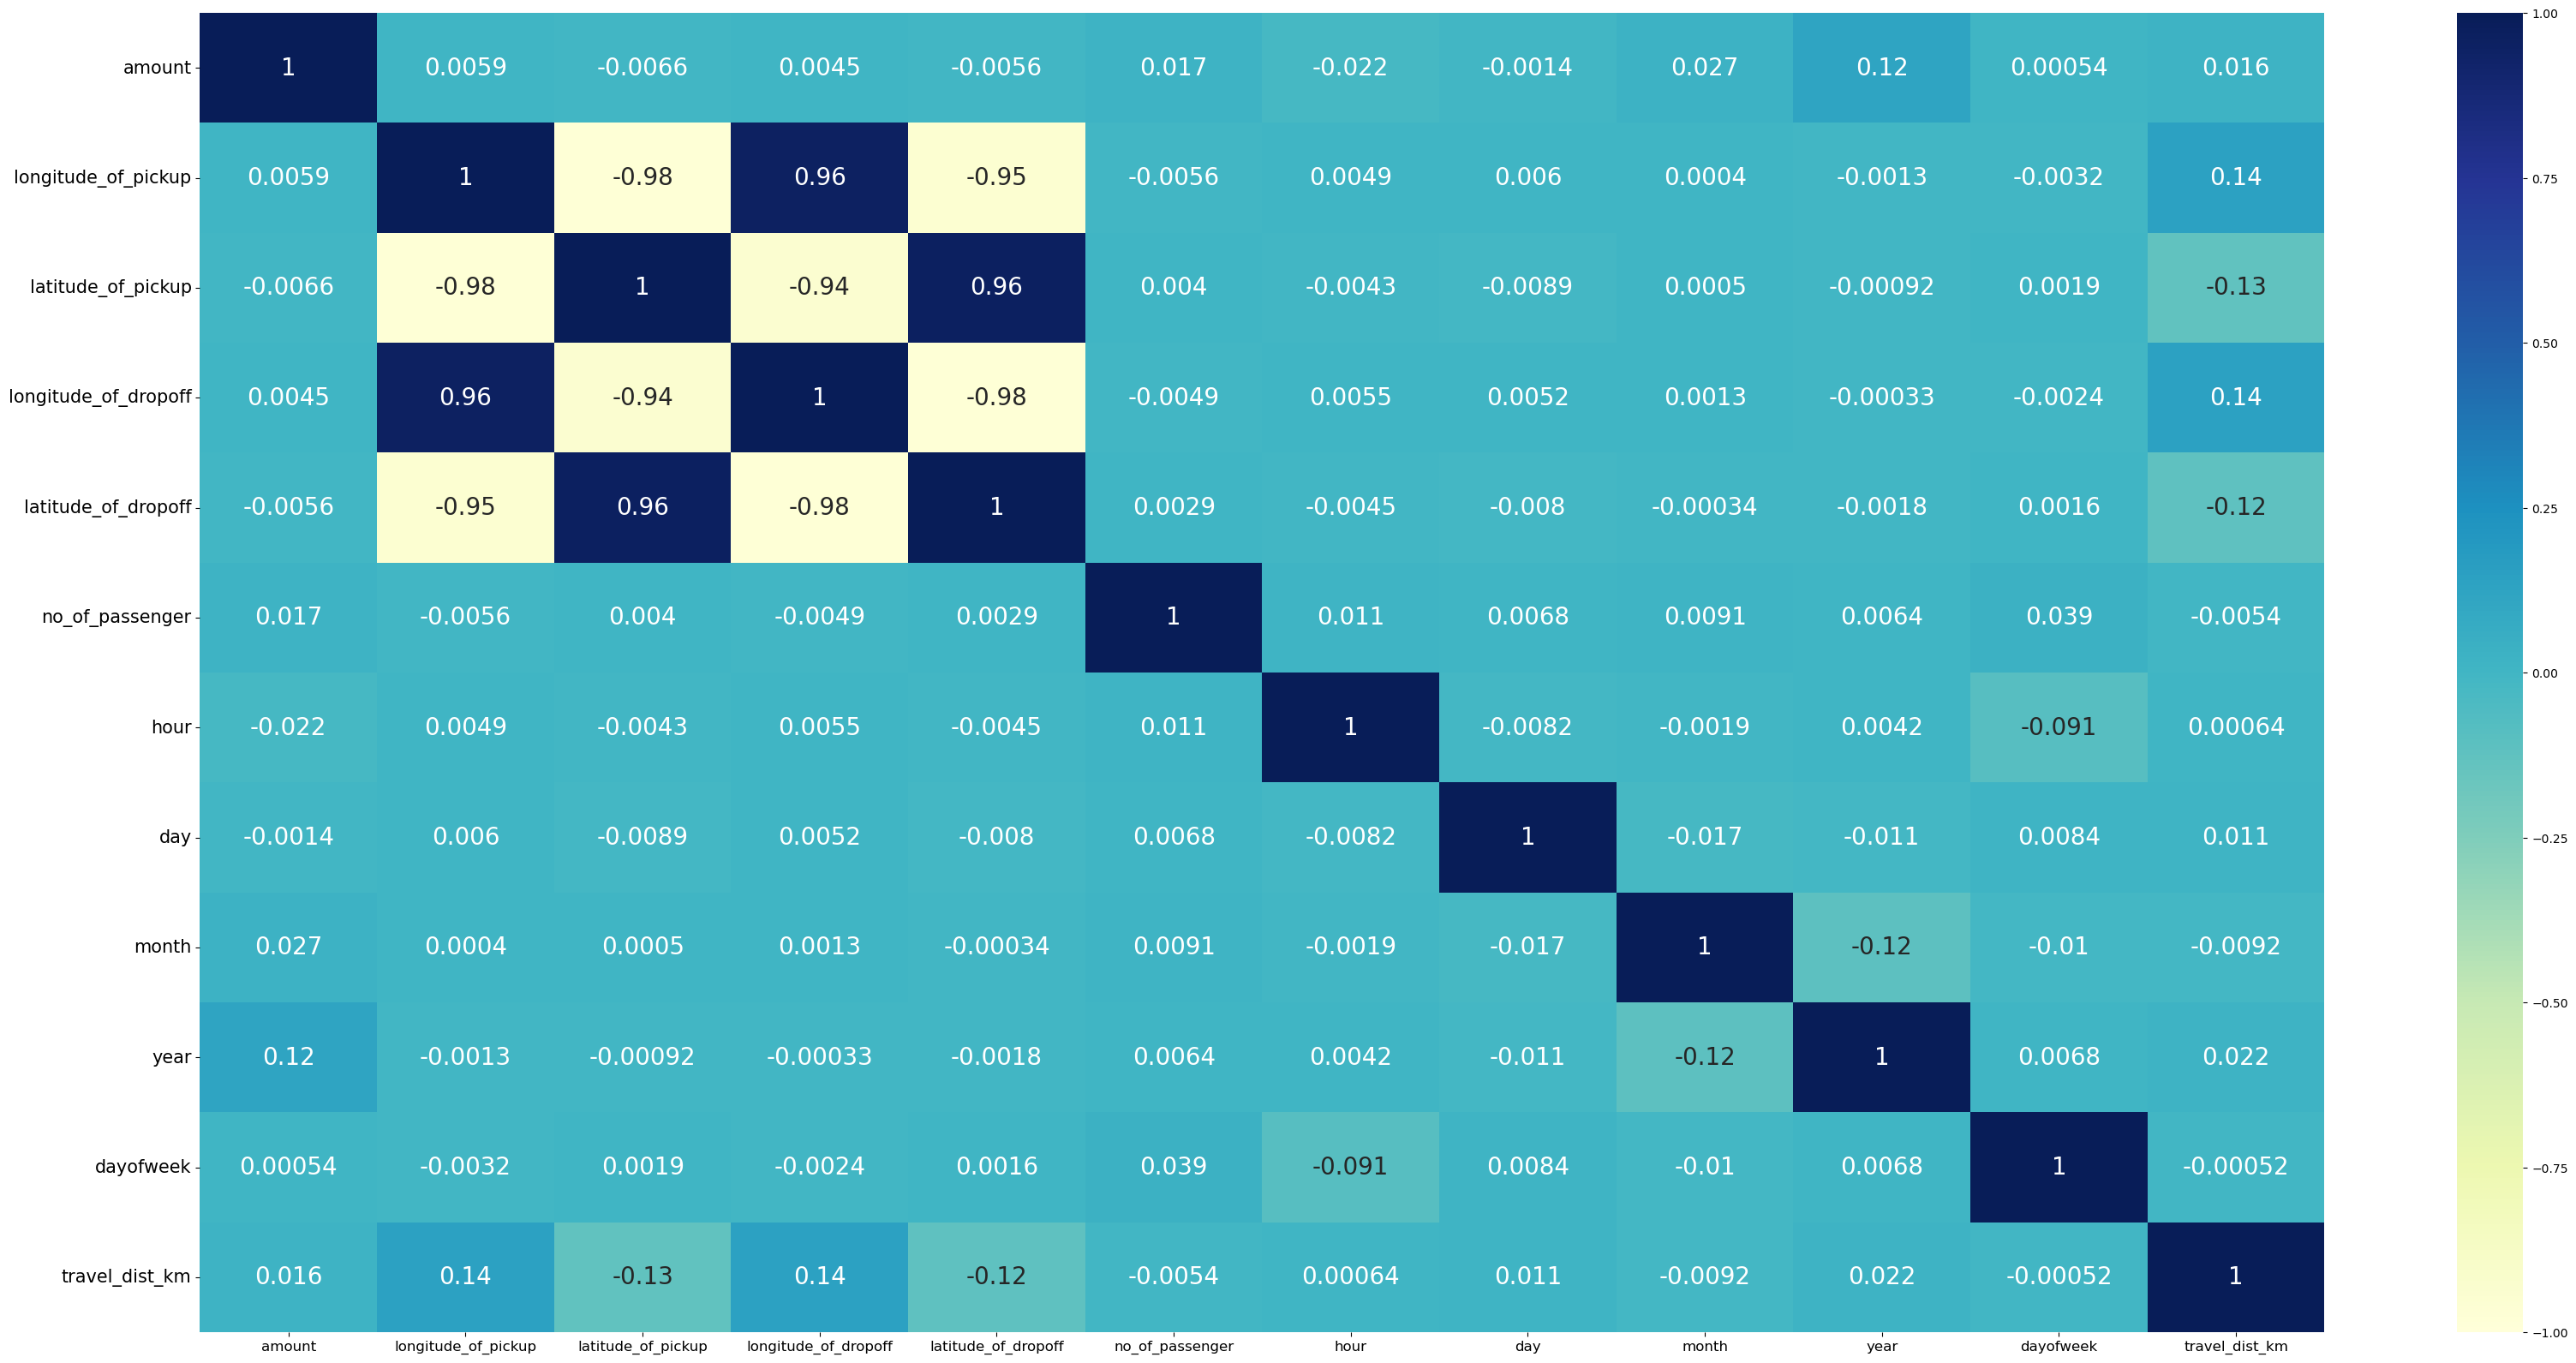

In [30]:
plt.figure(figsize = (40,20))
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 20})
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
plt.show()

### below map for easy to read

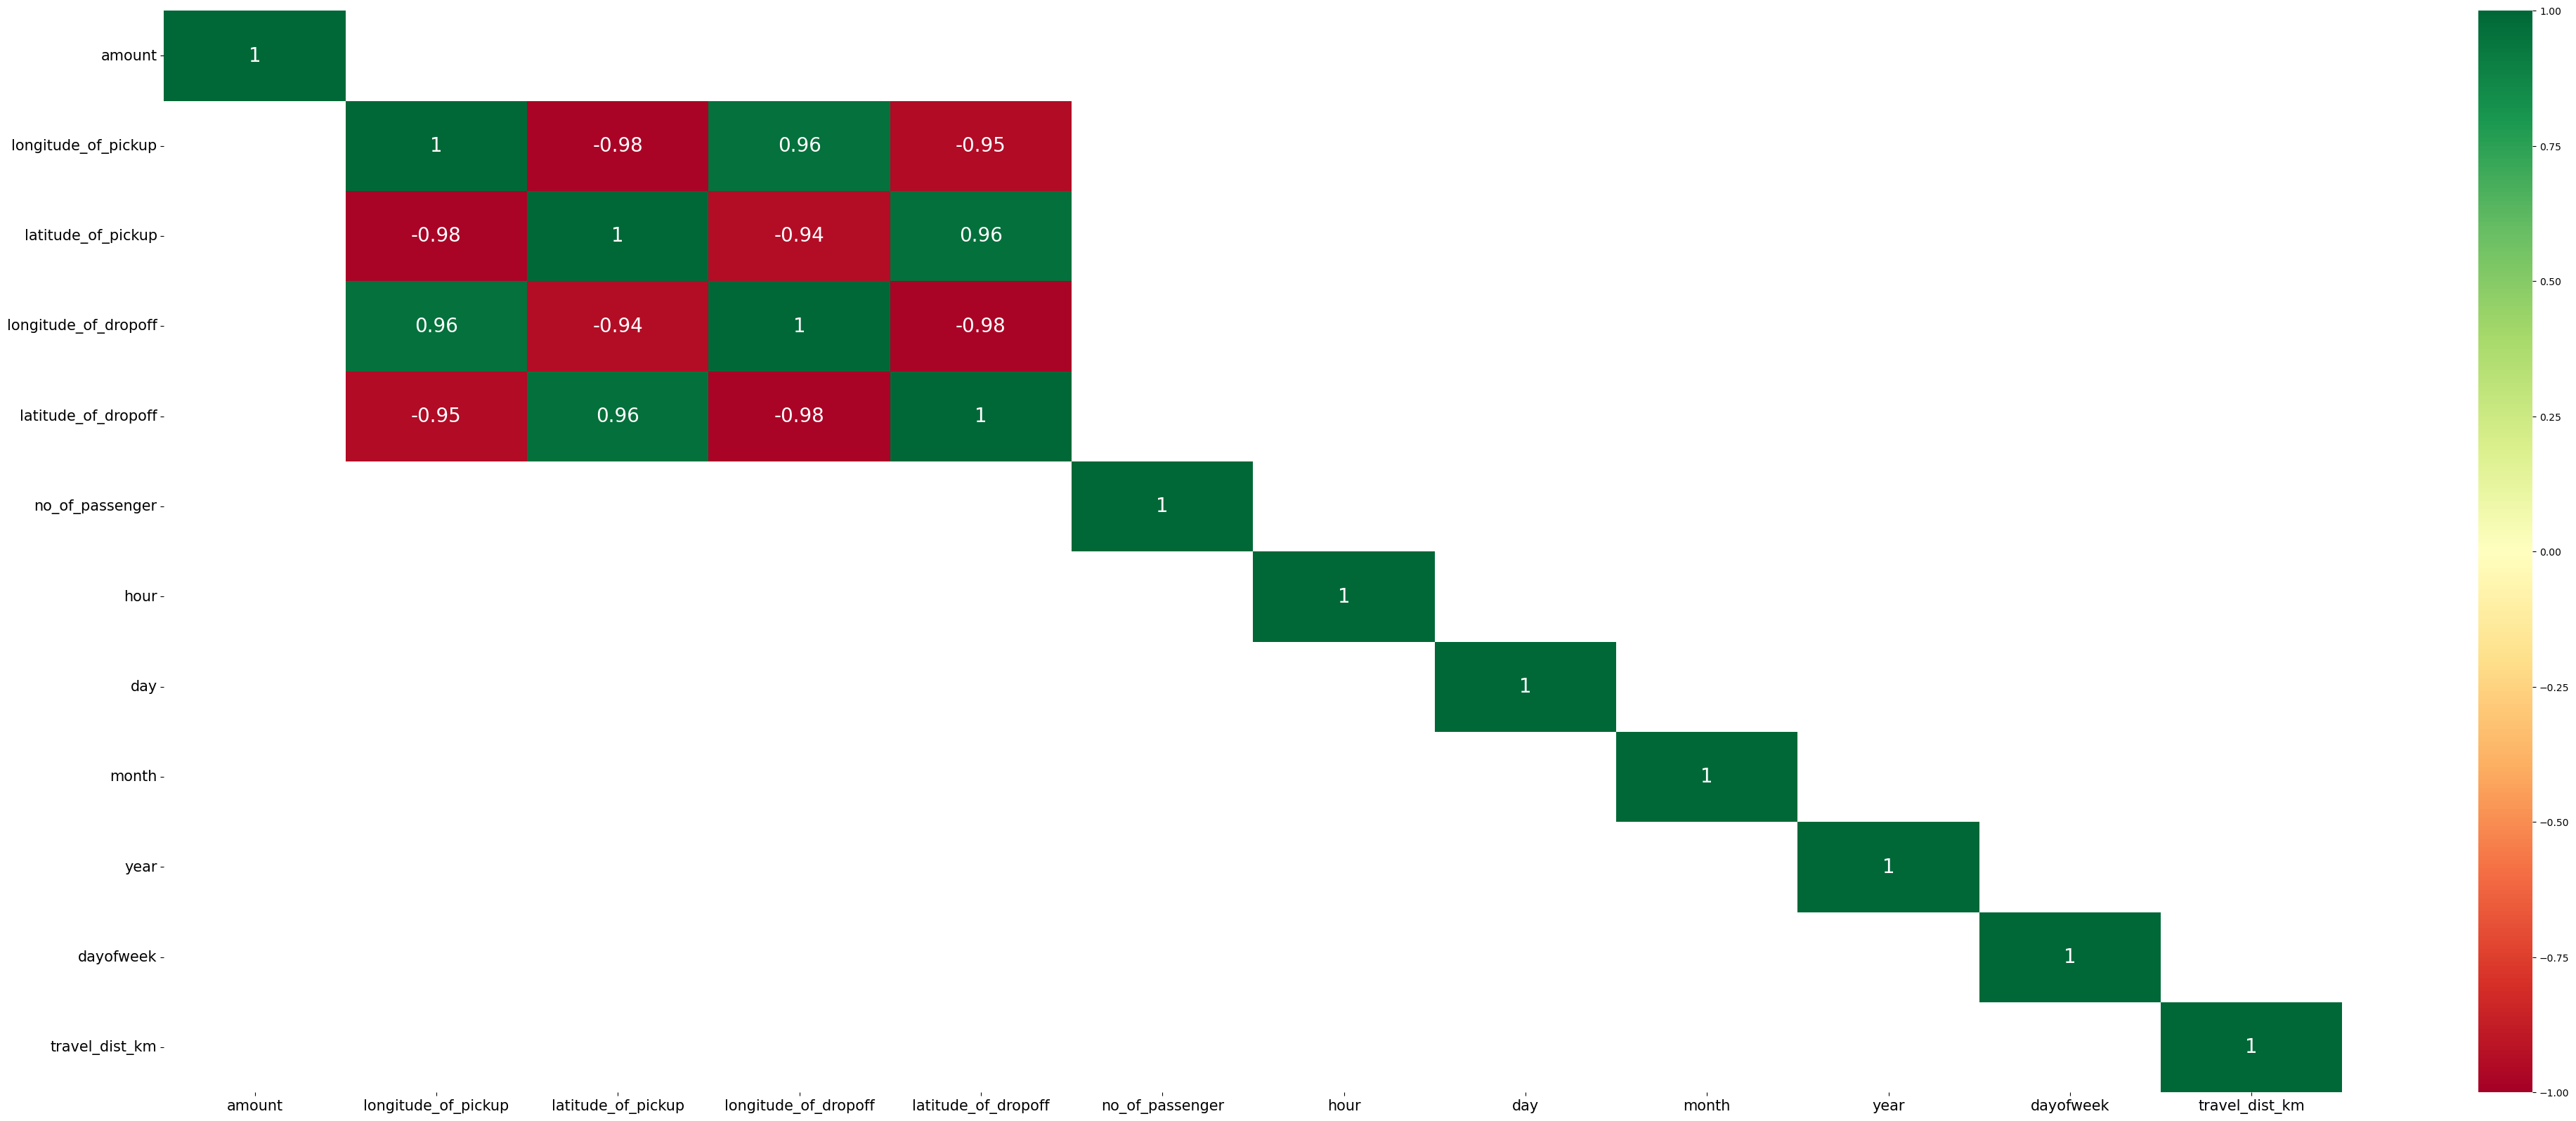

In [31]:
plt.figure(figsize=(50, 20))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Exploratory Data Analysis ( EDA )

4.2.1 Peak hours
We will check for the business during the weekdays and weekends.

	
We will check the peak hours during the following:

1. Weekdays
2. Weekends
1. Plot a countplot to check the peak hours during weekdays

 For Weekdays

<AxesSubplot:title={'center':'Taxi trips count during weekdays'}, xlabel='hour', ylabel='count'>

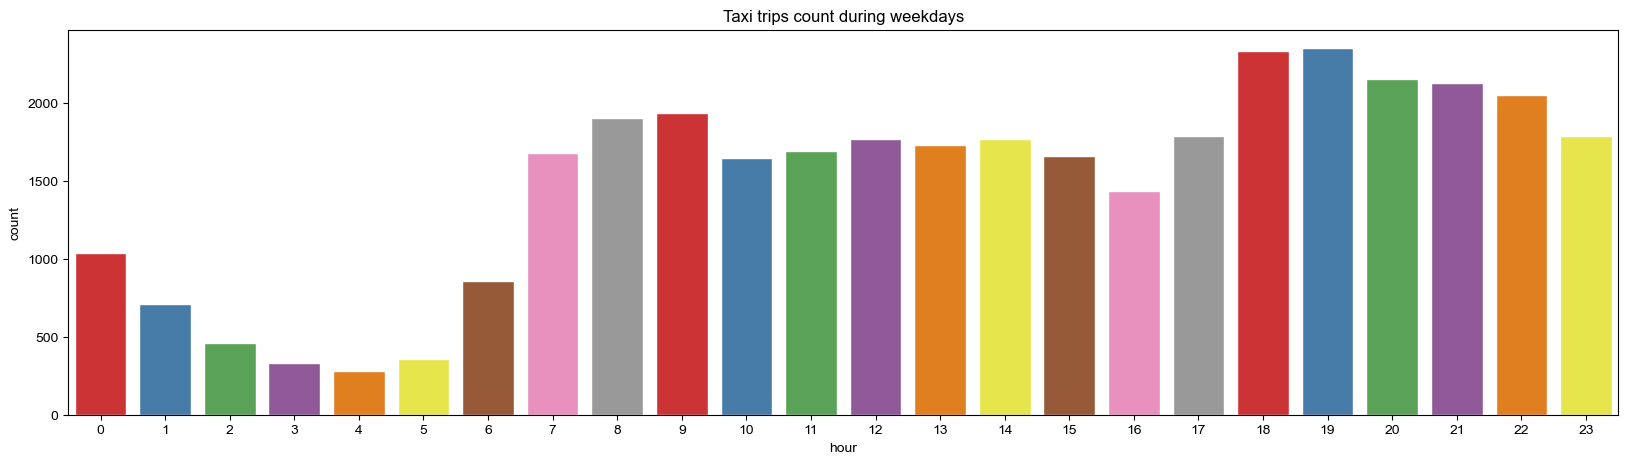

In [32]:
plt.figure(figsize=(20,5))
plt.title('Taxi trips count during weekdays')
sns.set_style("white")
#plot the countplot for weekdays
sns.countplot(x='hour', data=df_taxi.loc[(df_taxi.dayofweek >= 0) & (df_taxi.dayofweek <=4)],
              palette='Set1')

For WeekEnd

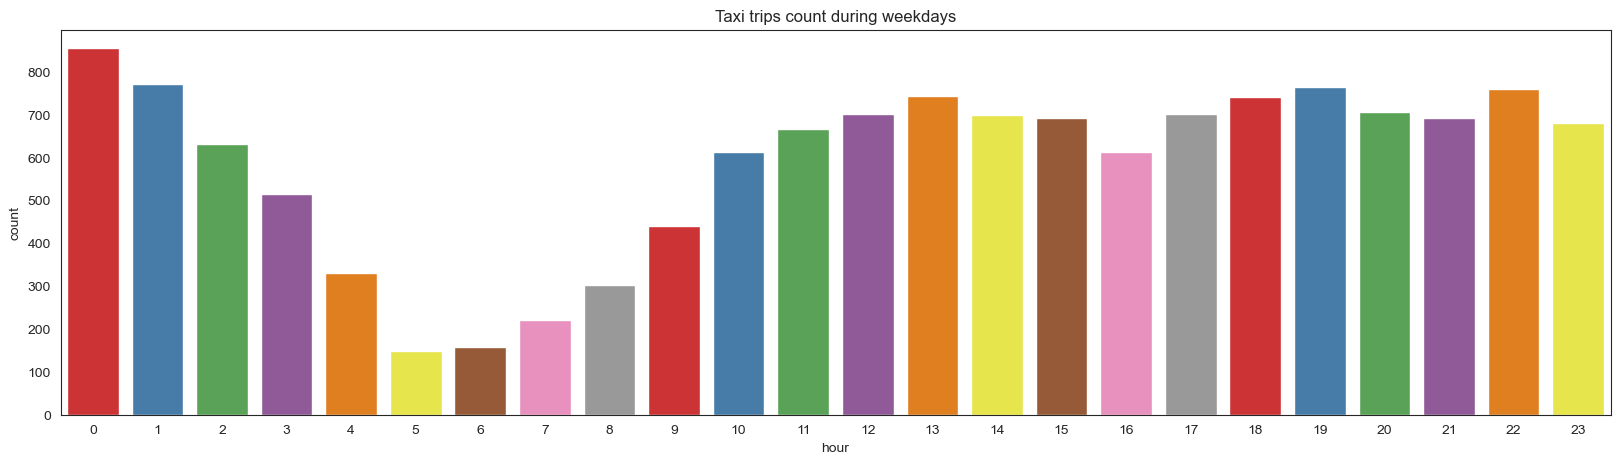

In [33]:
plt.figure(figsize = (20,5))
plt.title("Taxi trips count during weekdays")
sns.set_style("white")
sns.countplot(x = "hour", data = df_taxi.loc[(df_taxi.dayofweek >=5) & (df_taxi.dayofweek<=6)],palette = "Set1")
plt.show()

### Mean fare for each hour during weekdays and weekends
We will check the mean fares for each hour during the weekdays and weekends.

In [34]:
week_days = df_taxi.loc[(df_taxi.dayofweek >=0) & (df_taxi.dayofweek <=4)]
week_ends = df_taxi.loc[(df_taxi.dayofweek >=5) & (df_taxi.dayofweek <=6)]

In [35]:
week_days_fare = week_days.groupby(['hour']).amount.mean().to_frame().reset_index()
week_ends_fare = week_ends.groupby(['hour']).amount.mean().to_frame().reset_index()

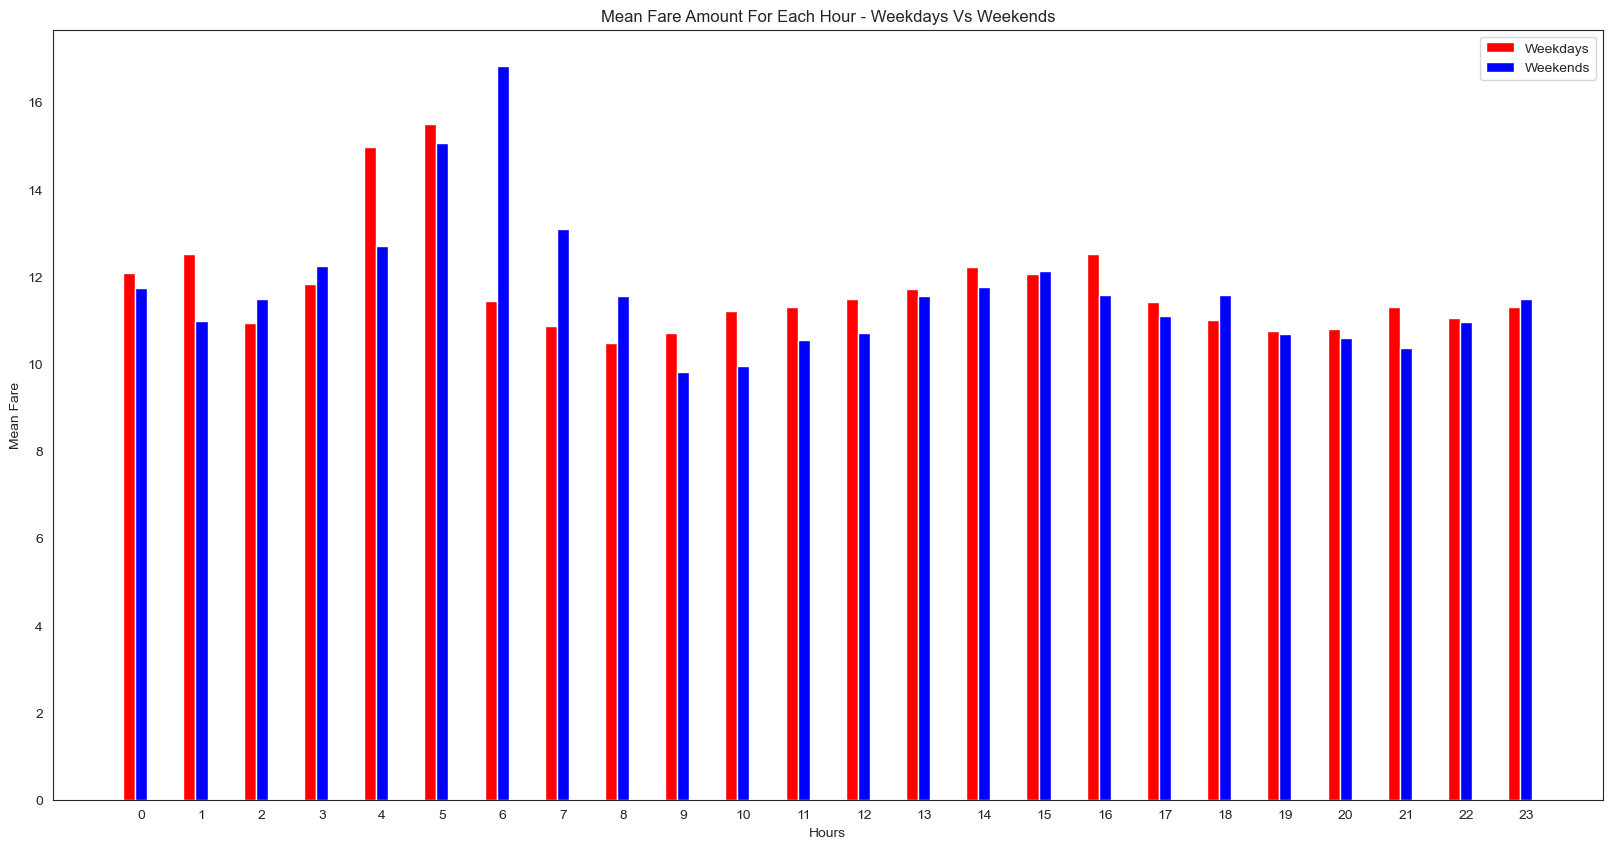

In [36]:
# hours
x = np.array(week_days_fare.hour)
# an array of week day fare 
y = np.array(week_days_fare.amount)
# an array of week end fare
z = np.array(week_ends_fare.amount)

# Set the figure size, title, x and y labels
plt.figure(figsize = (20,10))
plt.title('Mean Fare Amount For Each Hour - Weekdays Vs Weekends')
plt.xlabel('Hours')
plt.ylabel('Mean Fare')
# Pass the three integers. The value of these integer should be less that 10
ax=plt.subplot(1,1,1)
ax.bar(x-0.2, y, width=0.2, color='red', align='center', label = 'Weekdays')
ax.bar(x, z, width=0.2, color='blue', align='center', label = 'Weekends')
plt.xticks(range(0,24))
plt.legend()
plt.show()

### Distribution

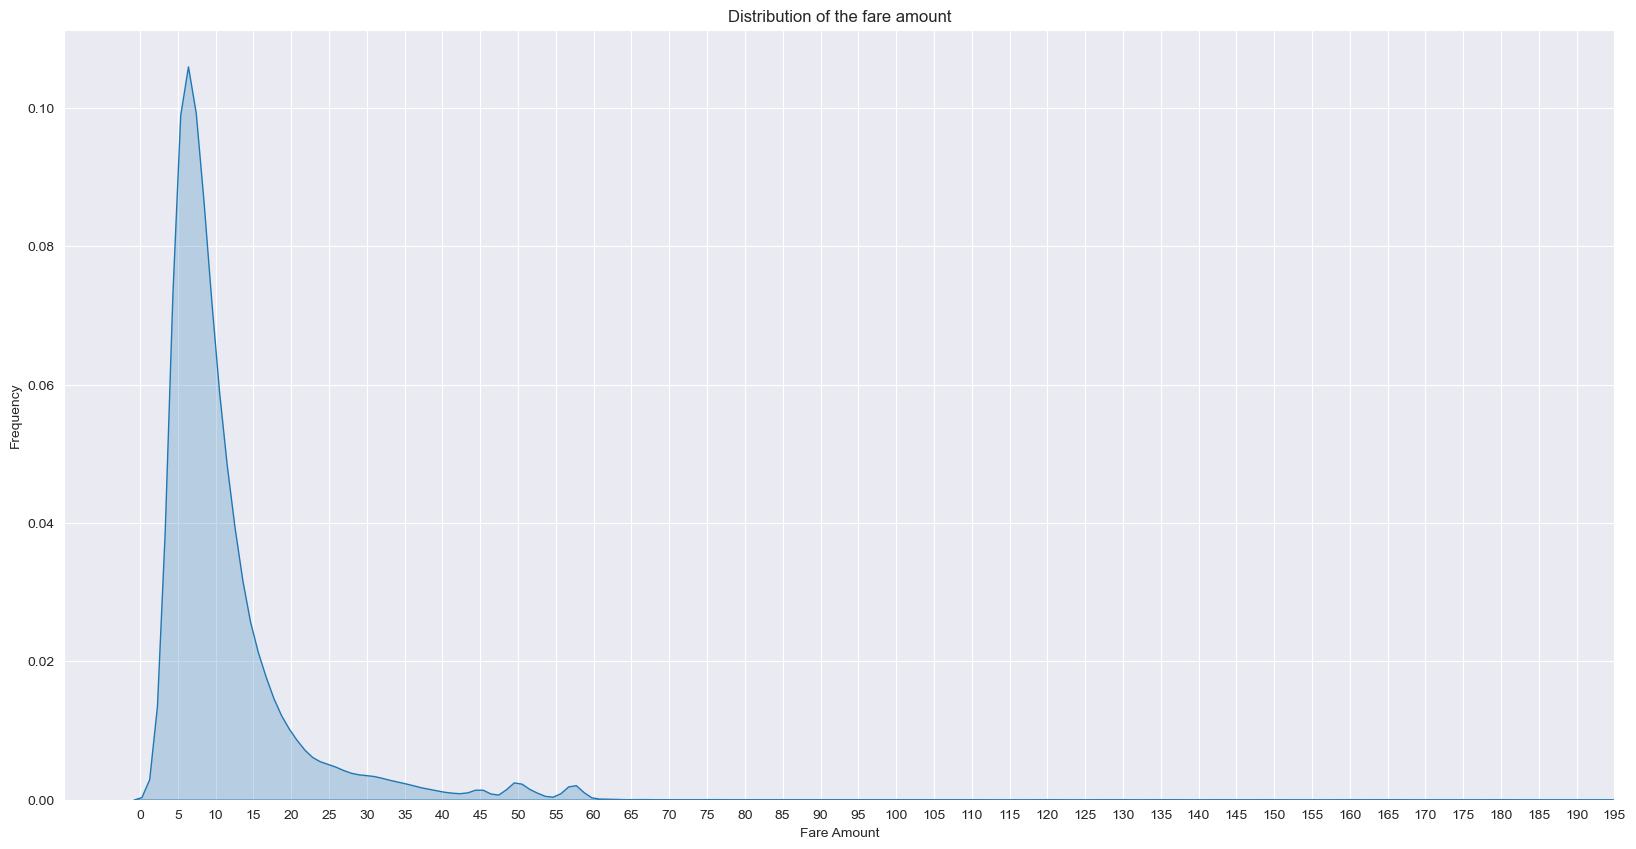

In [37]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Distribution of the fare amount")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.xlim(-10,20)
plt.xticks(range(0,200,5))

snsplot = sns.kdeplot(df_taxi.amount, shade=True)

In [38]:
df_taxi.amount.skew()

3.563475915504583

In [39]:
df_taxi.amount.kurtosis()

22.555210853577677

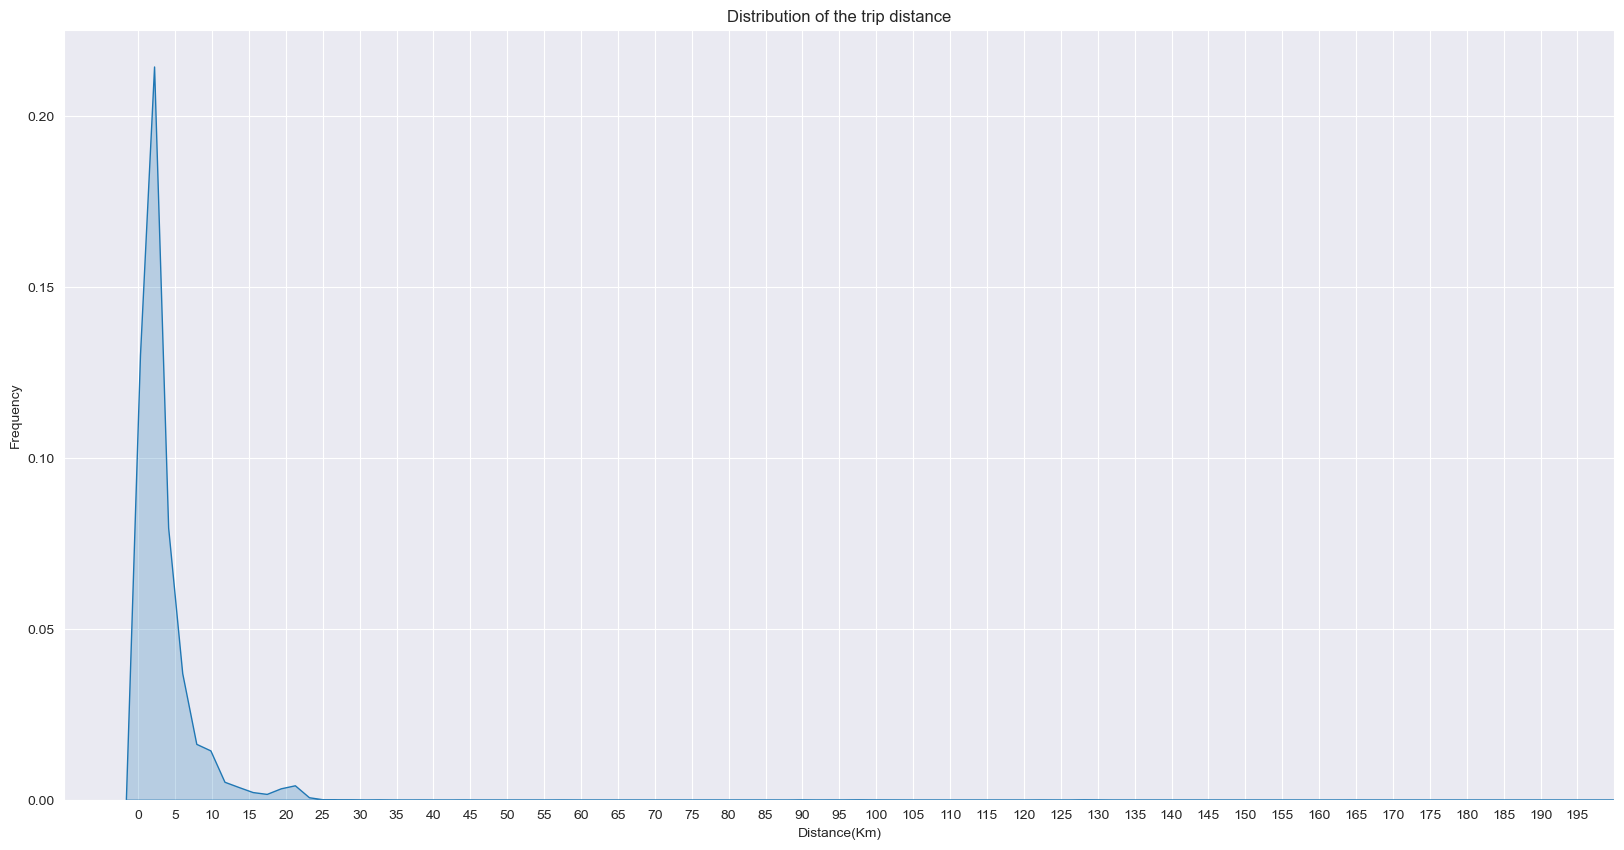

In [40]:
plt.figure(figsize = (20,10))
sns.style = ('darkgrid')
plt.title("Distribution of the trip distance")
plt.xlabel("Distance(Km)")
plt.ylabel("Frequency")
plt.xlim(-10, 200)
plt.xticks(range(0,200,5))

#Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of
#the continuous or non-parametric data variables
sns.plot = sns.kdeplot(df_taxi[df_taxi.travel_dist_km<600].travel_dist_km, shade=True)

### Model Building Random Forest
It is an example of the Bagging technique. It constructs multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees.

In this section we build a model using random forest regressor.

	
In order to build the model, we do the following:

1. Split the features and target into seperate data frames
2. Split the data into training and test sets
3. Build model
4. Predict the values using test set
5. Compute accuracy measures
6. Tabulate the results

In [41]:
X = df_taxi.drop("amount", axis = 1 )
y = pd.DataFrame(df_taxi.amount)

In [42]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,travel_dist_km
0,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


### Split the Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (34992, 11)
The shape of X_test is: (14997, 11)
The shape of y_train is: (34992, 1)
The shape of y_test is: (14997, 1)


### model

In [44]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=10)

### Predict the values on test set

In [45]:
y_pred = rf_reg.predict(X_test)

### Evaluate the model

In [46]:
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
# Mean Squared Error represents the difference between the original and predicted values which are 
# extracted by squaring the average difference over the dataset
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 2.06849660066934
Mean Squared Error (MSE): 19.606631425668667
Root Mean Squared Error (RMSE): 4.427937604084848


### Tabulating the result

In [47]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,2.068497,19.606631,4.427938


5.2 Random Forest with GridSearchCV
Now we show how a decision tree is optimized by cross-validation, which is done using the GridSearchCV() from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

	
Now we build a random forest using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Random Forest using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

In [48]:
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                     'min_samples_leaf': [5,10],
                     'max_leaf_nodes': [10, 15]
                    }]

In [49]:
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, param_grid = tuned_paramaters, cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'max_leaf_nodes': 15, 'min_samples_leaf': 10, 'min_samples_split': 15, 'n_estimators': 100} 



In [50]:
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

### Predicting the values

In [51]:
y_pred = dt_grid_model.predict(X_test)

In [52]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

Mean Absolute Error (MAE): 2.4707931553402824
Mean Squared Error (MSE): 22.41363262082127
Root Mean Squared Error (RMSE): 4.734303815855218


In [53]:
rf_reg_metrics = pd.Series({'Model': "Random Forest with GridSearchCV ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,MAE,MSE,RMSE
0,Random Forest,2.068497,19.606631,4.427938
1,Random Forest with GridSearchCV,2.470793,22.413633,4.734304


# Conclusion and Interpretation
	
The regression algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using MAE, MSE,RMSE.

The above result shows that the RMSE value for both the model is much less than the standard deviation of the 'amount' (target) variable. Both the models have performed well. We can further fine tune the model for various hyperparameter values.